# Install & Setting for TensorFlow Object Detection API

In [2]:
# tensorflow 버전 다운그레이드
!pip install tensorflow-gpu==1.15.2

     |████████████████████████████████| 411.0MB 34kB/s 
     |████████████████████████████████| 3.8MB 45.8MB/s 
     |████████████████████████████████| 512kB 46.5MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=3334212523eaaa3ba4c74e577f19ef18d28f11bba5e2f2f0c51f02a35ee8cdef
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing i

In [3]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [ ]:
# object detection API
!git clone https://github.com/tensorflow/models.git

In [ ]:
# coco evaluation API
!git clone https://github.com/cocodataset/cocoapi.git

## Environment Setup

In [4]:
%%bash
cd cocoapi/PythonAPI
make
cp -r pycocotools /~/models/research

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c pycocotools/_mask.c -o build/temp.linux-x86_64-3.6/pycocotools/_mask.o -Wno-cpp -Wno-unused-f

../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
                                                 ^
../common/maskApi.c: In function ‘rleFrPoly’:
../common/maskApi.c:166:3: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
   ^~~
../common/maskApi.c:166:54: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
                                                      ^
../common/maskApi.c:167:3: warning: this ‘for’ clause does not guard... [-Wmisleading

In [5]:
%%bash
cd /~/models/research/
protoc object_detection/protos/*.proto --python_out=.

In [6]:
%%bash
cd /~/models/research/
cp object_detection/packages/tf1/setup.py .
python -m pip install .

Processing /content/drive/My Drive/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1584282 sha256=87b068ee81ba4d1b72e5c5978be38443abc11c8f1a8a233fee8f913548fbea8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0sf63h_/wheels/c2/aa/a5/d66d82acb7c4274fd81cecca818e0bf840ace7b657663f672e
Successfully built object-detection


In [ ]:
# test run
!python /~/models/research/object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_wi

# Prepare Training Data




In [ ]:
# my dataset path
test_record_fname = '/Users/jarvis/Desktop/yoom/dataset/val.record-?????-of-00010'
train_record_fname = '/Users/jarvis/Desktop/yoom/dataset/train.record-?????-of-00010'
label_map_pbtxt_fname = '/Users/jarvis/Desktop/yoom/dataset/label_map.pbtxt'

# Custom TensorFlow1 Configuration



In [ ]:
# pretrained model download
# tensorflow model zoo link
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md
# 모델에 따라 pipeline name, finetunecheckpoint path name 수정 요망

%mkdir /~/models/research/deploy/
%cd /~/models/research/deploy/

import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_2018_01_28.tar.gz'

!wget {download_tar}
tar = tarfile.open('faster_rcnn_resnet101_coco_2018_01_28.tar.gz')
tar.extractall()
tar.close()

In [ ]:
# pipeline file custom
pipeline_fname = '/~/models/research/deploy/faster_rcnn_resnet101_coco_2018_01_28/pipeline.config'
fine_tune_checkpoint = '/~/models/research/deploy/faster_rcnn_resnet101_coco_2018_01_28/model.ckpt'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print(num_classes)

# batch, step setting
num_steps = 25000
batch_size = 8

In [ ]:
# override custom configuration file
import re
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('/~/models/research/deploy/pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/mscoco_train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/mscoco_val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # training batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # training steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # number of classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    # fine_tune_checkpoint type
    # s = re.sub(
    #     'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)

# Train







In [ ]:
# config file check
%cat /~/models/research/deploy/pipeline_file.config

model {
  ssd {
    num_classes: 9
    image_resizer {
      fixed_shape_resizer {
        height: 640
        width: 640
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.000399999989895
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.0299999993294
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019
          scale: true
          epsilon: 0.0010000000475
        }
      }
      override_base_feature_extractor_hyperparams: true
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        

In [ ]:
# ouput model directory
model_dir = '/~/training_output/'
pipeline_file = '/~/models/research/deploy/pipeline_file.config'

In [ ]:
# training script run
!python /~/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr

/content/drive/My Drive
2020-10-16 08:29:37.855587: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-16 08:29:37.860339: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-10-16 08:29:37.860604: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2ab2840 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-10-16 08:29:37.860640: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-10-16 08:29:37.863286: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-16 08:29:37.975834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-1

# Export

In [ ]:
# export to inference graph
trained_checkpoint = '/~/training_output'
output_directory = '/~/training_resfpn/export'

In [ ]:
from object_detection.utils.config_util import create_pipeline_proto_from_configs
from object_detection.utils.config_util import get_configs_from_pipeline_file
import object_detection.exporter_savedmodel

# Configuration proto 생성
configs = get_configs_from_pipeline_file(pipeline_file)
pipeline_proto = create_pipeline_proto_from_configs(configs=configs)

checkpoint = tf.train.get_checkpoint_state(trained_checkpoint)
input_checkpoint = checkpoint.model_checkpoint_path

# export script run
object_detection.exporter_savedmodel.export_inference_graph(input_type='encoded_image_string_tensor',
                                                            pipeline_config=pipeline_proto,
                                                            trained_checkpoint_prefix=input_checkpoint,
                                                            output_directory=output_directory)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please switch to tf.train.get_or_create_global_step


Instructions for updating:
Use standard file APIs to check for files with this prefix.



INFO:tensorflow:Restoring parameters from /content/drive/My Drive/od/training_resfpn/model.ckpt-60000


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/od/training_resfpn/model.ckpt-60000


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


INFO:tensorflow:Froze 463 variables.


INFO:tensorflow:Froze 463 variables.


INFO:tensorflow:Converted 463 variables to const ops.


INFO:tensorflow:Converted 463 variables to const ops.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/od/training_resfpn/model.ckpt-60000


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/od/training_resfpn/model.ckpt-60000


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: /content/drive/My Drive/od/training_resfpn/output2/saved_model.pb


INFO:tensorflow:SavedModel written to: /content/drive/My Drive/od/training_resfpn/output2/saved_model.pb


# Tensorflow Serving

In [ ]:
# model check
# exported directory 내 version number named directory 생성 요망 
!saved_model_cli show --dir '/~/training_resfpn/export/1' --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['detection_signature']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['inputs'] tensor_info:
        dtype: DT_STRING
        shape: (-1)
        name: encoded_image_string_tensor:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['detection_boxes'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 100, 4)
        name: detection_boxes:0
    outputs['detection_classes'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 100)
        name: detection_classes:0
    outputs['detection_scores'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 100)
        name: detection_scores:0
    outputs['num_detections'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1)
        name: num_detections:0
  Method name is: tensorflow/serving/predict

signature_def['serving_default']:
  The given SavedModel SignatureDef contain

In [ ]:
# install tensorflow serving
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   7546      0 --:--:-- --:--:-- --:--:--  7546
OK


In [ ]:
!apt update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://storage.googleapis.com/tensorflow-serving-apt stable InRel

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 3s (62.0 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [ ]:
import os

MODEL_DIR = '/~/training_output/export'
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
# server 띄우기
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=serving \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
# 로그 확인
!tail server.log

2020-10-20 07:47:28.330006: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-10-20 07:47:28.419121: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:199] Restoring SavedModel bundle.
2020-10-20 07:47:31.277214: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 2975073 microseconds.
2020-10-20 07:47:31.289538: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /content/drive/My Drive/od/training_resfpn/output2/1/assets.extra/tf_serving_warmup_requests
2020-10-20 07:47:31.292738: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded serva

# Inference

In [ ]:
!pip install -q requests

In [ ]:
# input data serialization
import base64
import requests
import json

filepath = 'input_file_path'
with open(filepath, "rb") as image:
    image_data = image.read()
    encoded_input_string = base64.b64encode(image_data).decode('utf-8')

data = json.dumps({"signature_name": "serving_default", "instances": [{"inputs": {'b64': encoded_input_string}}]})

In [ ]:
headers = {"content-type": "application/json"}
json_response = requests.post("http://localhost:8501/v1/models/serving:predict", data=data, headers=headers)

print(json_response.text)

{
    "predictions": [
        {
            "detection_scores": [0.374666393, 0.35825187, 0.32954222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            "detection_classes": [9.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

# Visualization

In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
import json
import requests
import numpy as np
from PIL import Image
import base64

def show_inference(image_path):
    # 이미지 크기 축소
    image = Image.open(image_path)
    image = image.resize((640, 640))
    image.save(image_path)

    # 이미지 추론
    filepath = image_path
    with open(filepath, "rb") as image:
    image_data = image.read()
    encoded_input_string = base64.b64encode(image_data).decode('utf-8')

    data = json.dumps({"signature_name": "serving_default", "instances": [{"inputs": {'b64': encoded_input_string}}]})
    headers = {"content-type": "application/json"}
    json_response = requests.post('http://localhost:8501/v1/models/serving:predict', data=data, headers=headers)
    predictions = json.loads(json_response.text)['predictions'][0]
    print(json_response.text)
    
    # label map path 지정 요망
    category_index = label_map_util.create_category_index_from_labelmap('/~/label_map.pbtxt', use_display_name=True)

    # 이미지 및 결과 시각화
    image = Image.open(image_path)
    width, height = image.size
    image_np = np.array(image)
    image = image_np.reshape([-1, height, width, 3])

    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      np.array(predictions['detection_boxes']),
      np.array(predictions['detection_classes']).astype(np.int64),
      np.array(predictions['detection_scores']),
      category_index,
      instance_masks=predictions.get('detection_masks_reframed', None),
      min_score_thresh=0.3,
      use_normalized_coordinates=True,
      line_thickness=3)

    display(Image.fromarray(image_np))
  

{
    "predictions": [
        {
            "detection_classes": [1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            "num_detections": 2.0,
            "detection_boxes": [[0.0312090218, 0.131161, 0.959236, 0.975842476], [0.0268086493, 0.123968095, 0.957961679, 0.978578687], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0

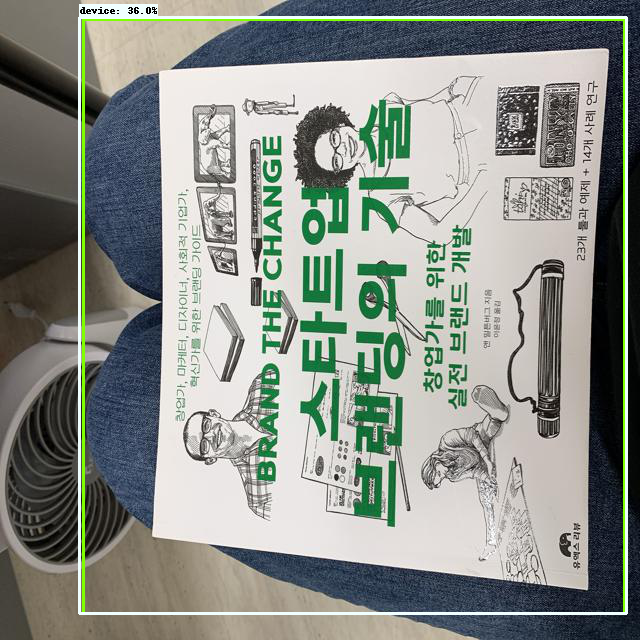

In [ ]:
show_inference('input_file_path')